First Iteration of random_centers:
	MSE for k=2: 471.18340539890113
	# of iterations = 8


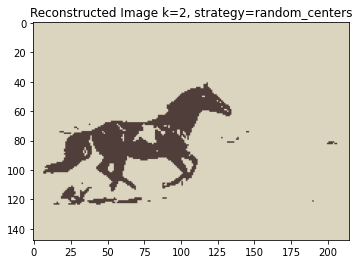

Second Iteration of random_centers:
	MSE for k=2: 471.18340539890113
	# of iterations = 9


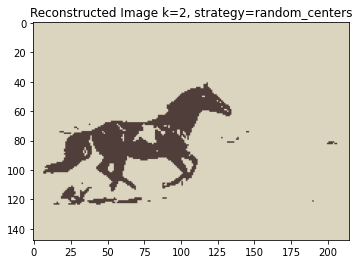

Iteration of max_distance:
	MSE for k=2: 471.18340539890113
	# of iterations = 9


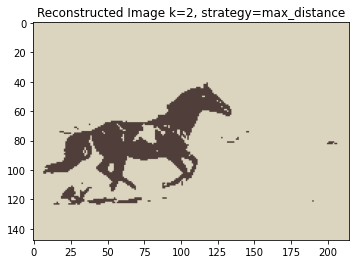

First Iteration of random_centers:
	MSE for k=3: 271.13973813195423
	# of iterations = 34


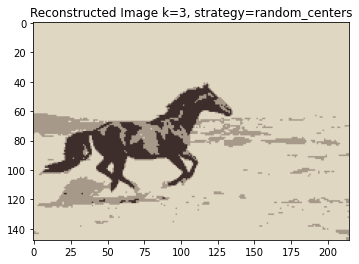

Second Iteration of random_centers:
	MSE for k=3: 271.13956526956486
	# of iterations = 9


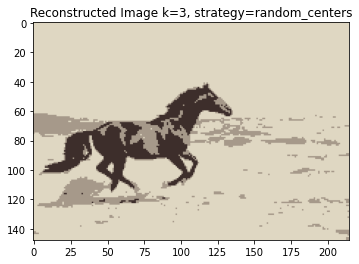

Iteration of max_distance:
	MSE for k=3: 271.13973813195423
	# of iterations = 36


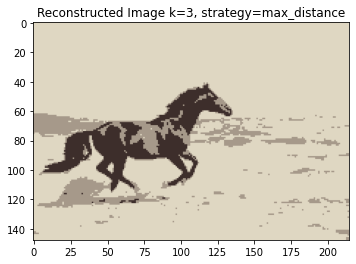

First Iteration of random_centers:
	MSE for k=10: 55.53956673065252
	# of iterations = 69


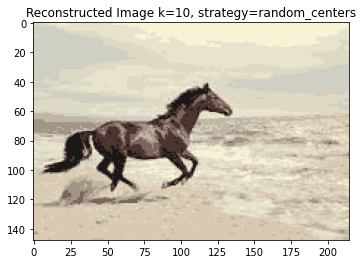

Second Iteration of random_centers:
	MSE for k=10: 55.53956673065252
	# of iterations = 65


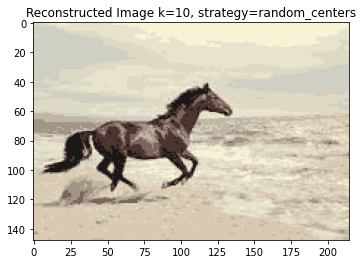

Iteration of max_distance:
	MSE for k=10: 54.02838205501795
	# of iterations = 147


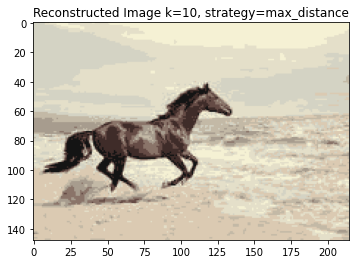

First Iteration of random_centers:
	MSE for k=20: 29.99692800875767
	# of iterations = 166


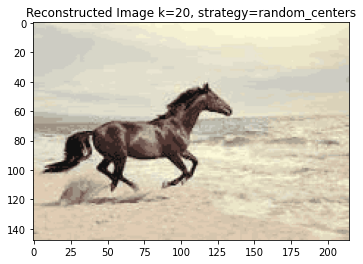

Second Iteration of random_centers:
	MSE for k=20: 29.762638159422508
	# of iterations = 199


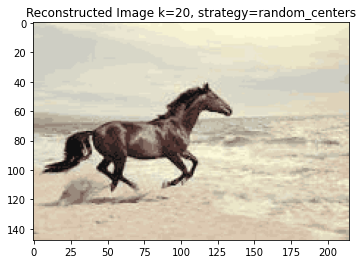

Iteration of max_distance:
	MSE for k=20: 31.130809013680178
	# of iterations = 199


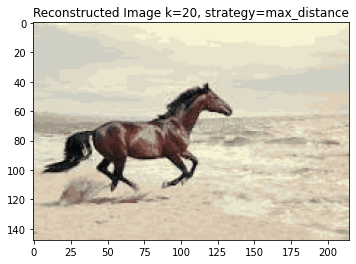

First Iteration of random_centers:
	MSE for k=40: 20.174049573253292
	# of iterations = 171


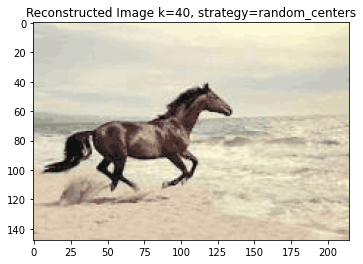

Second Iteration of random_centers:
	MSE for k=40: 19.004637816442372
	# of iterations = 199


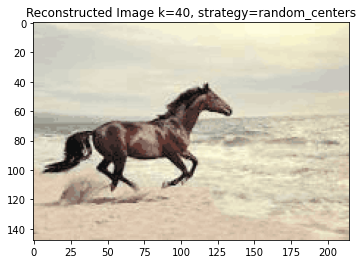

Iteration of max_distance:
	MSE for k=40: 23.38612065497985
	# of iterations = 199


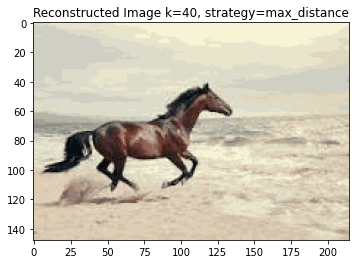

First Iteration of random_centers:
	MSE for k=2: 434.0003361222744
	# of iterations = 17


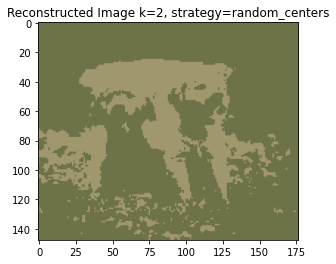

Second Iteration of random_centers:
	MSE for k=2: 434.0003361222744
	# of iterations = 23


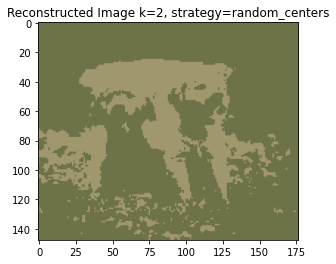

Iteration of max_distance:
	MSE for k=2: 434.0003361222744
	# of iterations = 19


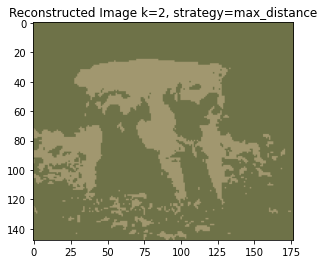

First Iteration of random_centers:
	MSE for k=3: 301.93501864905653
	# of iterations = 37


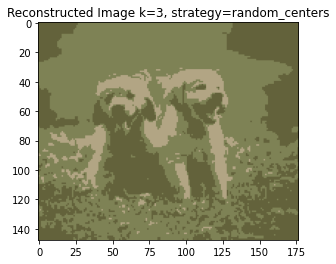

Second Iteration of random_centers:
	MSE for k=3: 301.93501864905653
	# of iterations = 36


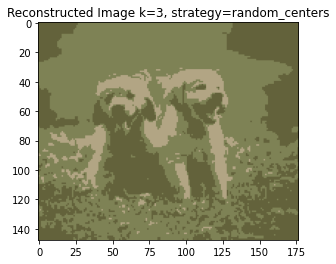

Iteration of max_distance:
	MSE for k=3: 301.93501864905653
	# of iterations = 42


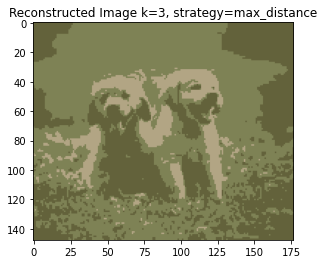

First Iteration of random_centers:
	MSE for k=10: 85.97552339460118
	# of iterations = 51


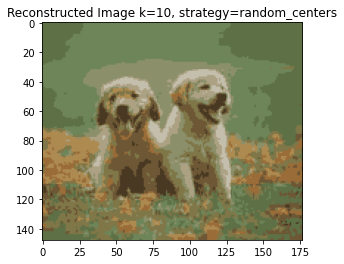

Second Iteration of random_centers:
	MSE for k=10: 86.44827574084721
	# of iterations = 55


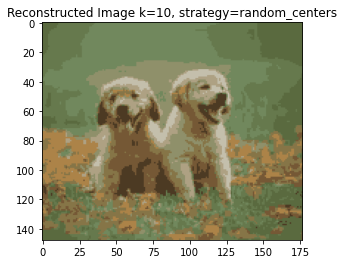

Iteration of max_distance:
	MSE for k=10: 85.8788868661963
	# of iterations = 67


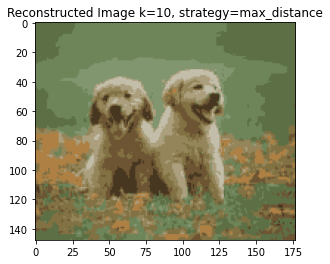

First Iteration of random_centers:
	MSE for k=20: 44.51547000039864
	# of iterations = 71


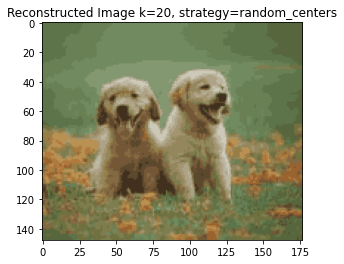

Second Iteration of random_centers:
	MSE for k=20: 45.824075925849165
	# of iterations = 42


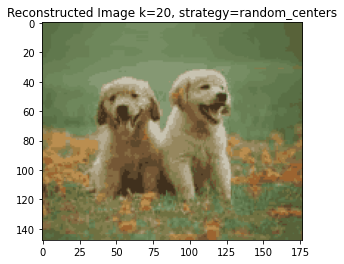

Iteration of max_distance:
	MSE for k=20: 44.95401569635182
	# of iterations = 84


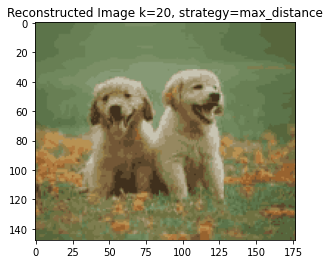

First Iteration of random_centers:
	MSE for k=40: 27.075272777791074
	# of iterations = 94


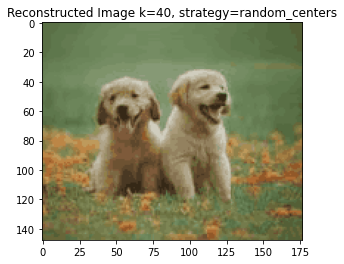

Second Iteration of random_centers:
	MSE for k=40: 27.4888626557069
	# of iterations = 118


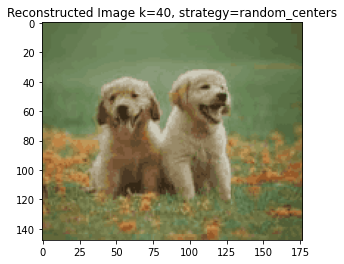

Iteration of max_distance:
	MSE for k=40: 27.3197537007335
	# of iterations = 133


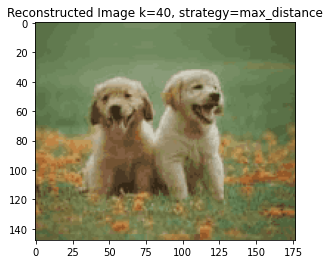

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# image compression class
class ImageCompression:
    
    # initializing the original image, its shape, and the reshaped image
    def __init__(self, image_path):
        # Reading the image and storing it as a NumPy array
        self.original_image = self.read_image(image_path)
        # Storing the shape of the original image
        self.original_shape = self.original_image.shape
        # Reshaping the image to a 2D array
        self.reshaped_image = self.reshape_image(self.original_image)
    
    # function to read the image and open it as a 3D NumPy array
    def read_image(self, image_path):
        img = Image.open(image_path)
        return np.array(img)
    
    # function to reshape the 3D image array to a 2D array
    def reshape_image(self, image):
        height, width, channels = image.shape
        reshaped_image = image.reshape(height * width, channels)
        return reshaped_image
    
    # k-means clustering function
    def k_means_clustering(self, k, max_iters, initialization_strategy):
        # initializing centroids used for k-means clustering
        centroids = self.initialize_centroids(self.reshaped_image, k, initialization_strategy)
        
        # number of iterations for each data point
        for i in range(max_iters):
            # assigning each point to a centroid
            assignments = self.assign_to_centroids(self.reshaped_image, centroids)
            
            # updating the new centroid considering new clusters
            new_centroids = self.update_centroids(self.reshaped_image, assignments, k)
            
            # if all points are assigned, break loop
            if np.allclose(centroids, new_centroids):
                break
            
            # store the new centroids and the number of iterations
            centroids = new_centroids
            num_iterations = i
        return centroids, assignments, num_iterations
    
    # initializing centroids using appropriate measures for each strategy 
    def initialize_centroids(self, data, k, initialization_strategy):
        # random chosen unique centers without replacement from retrieved data
        if initialization_strategy == 'random_centers':
            centroids = data[np.random.choice(data.shape[0], k, replace=False)]
        elif initialization_strategy == 'max_distance':
            # Randomly select the first centroid
            centroids = [data[np.random.randint(data.shape[0])]]
            
            # Continue adding centroids until k centroids are chosen
            while len(centroids) < k:
                # Calculate the minimum distances between points and existing centroids
                distances = np.array([min(np.linalg.norm(centroid - point) for centroid in centroids) for point in data])
                # Choose the point with the maximum distance as the new centroid
                new_centroid_index = np.argmax(distances)
                centroids.append(data[new_centroid_index])
            
            centroids = np.array(centroids)
        return centroids
    
    # function to assign data points to a centroid
    def assign_to_centroids(self, data, centroids):
        # Assign each data point to the nearest centroid
        assignments = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
        return assignments
    
    # function to update the centroids based on data point assignments
    def update_centroids(self, data, assignments, k):
        # Update centroids by calculating mean of assigned data points
        centroids = np.array([data[assignments == i].mean(axis=0) if np.sum(assignments == i) > 0 else np.zeros(data.shape[1]) for i in range(k)])
        return centroids
    
    # calculating Mean Squared Error (MSE) between original and reconstructed image
    def calculate_MSE(self, reconstructed_image):
        mse = np.mean((self.original_image - reconstructed_image) ** 2)
        return mse
    
    # reconstructing the image based on k-means clustering 
    def reconstruct_image(self, assignments, centroids):
        # Reconstruct image using centroids and assignments
        reconstructed_image = centroids[assignments]
        return reconstructed_image.reshape(self.original_shape)

# main function to run the image compression
def main():
    images = ['horse.jpg', 'dogs.jpg']  # two chosen images
    k_values = [2, 3, 10, 20, 40]  # k values
    max_iters = 200  # initialized max iterations
    initialization_strategies = ['random_centers', 'max_distance']  # two initialization strategies
    
    # iterating through each image
    for image_path in images:
        image_compressor = ImageCompression(image_path)
        
        # iterating through k values in the list
        for k in k_values:
            # choosing initialization strategy
            for strategy in initialization_strategies:
                
                # two trials of random_center strategy
                if strategy == 'random_centers':
                    # First iteration of random centers initialization
                    print("First Iteration of random_centers:")
                    centroids, assignments, num_iterations = image_compressor.k_means_clustering(k, max_iters, strategy)
                    reconstructed_img = image_compressor.reconstruct_image(assignments, centroids)

                    mse = image_compressor.calculate_MSE(reconstructed_img)
                    print(f"\tMSE for k={k}: {mse}\n\t# of iterations = {num_iterations}")

                    # Display reconstructed image
                    plt.imshow(reconstructed_img.astype('uint8'))
                    plt.title(f"Reconstructed Image k={k}, strategy={strategy}")
                    plt.show()

                    # Second iteration of random centers initialization
                    print("Second Iteration of random_centers:")
                    centroids, assignments, num_iterations = image_compressor.k_means_clustering(k, max_iters, strategy)
                    reconstructed_img = image_compressor.reconstruct_image(assignments, centroids)

                    mse = image_compressor.calculate_MSE(reconstructed_img)
                    print(f"\tMSE for k={k}: {mse}\n\t# of iterations = {num_iterations}")

                    # Display reconstructed image
                    plt.imshow(reconstructed_img.astype('uint8'))
                    plt.title(f"Reconstructed Image k={k}, strategy={strategy}")
                    plt.show()

                # one trial of max_distance strategy
                elif strategy == 'max_distance':
                    print("Iteration of max_distance:")
                    centroids, assignments, num_iterations = image_compressor.k_means_clustering(k, max_iters, strategy)
                    reconstructed_img = image_compressor.reconstruct_image(assignments, centroids)

                    mse = image_compressor.calculate_MSE(reconstructed_img)
                    print(f"\tMSE for k={k}: {mse}\n\t# of iterations = {num_iterations}")

                    # Display reconstructed image
                    plt.imshow(reconstructed_img.astype('uint8'))
                    plt.title(f"Reconstructed Image k={k}, strategy={strategy}")
                    plt.show()

if __name__ == "__main__":
    main()
